In [83]:
import glob
import cv2
import os
import string
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
png_files = glob.glob('test/*.png')


In [4]:
png_files[:10]

['test/2a8he.png',
 'test/2a6nr.png',
 'test/2a6n6.png',
 'test/2a6cf.png',
 'test/2a3mm.png',
 'test/2a2aa.png',
 'test/2a5ge.png',
 'test/2a5rc.png',
 'test/2a5fm.png',
 'test/2a3mh.png']

In [21]:
img_file = cv2.imread(png_files[0],cv2.IMREAD_UNCHANGED)#IMREAD_GRAYSCALE)
img_file.shape
#print(img_file)

(50, 200, 4)

In [36]:
im_arr = cv2.cvtColor(img_file,  cv2.COLOR_BGR2RGB)

In [38]:
channels = cv2.split(img_file)[3]
print(channels)

[[255 255 255 ... 255 255 255]
 [255   0   0 ...   0   0 255]
 [255   0   0 ...   0   0 255]
 ...
 [255   0   0 ...   0   0 255]
 [255   0   0 ...   0   0 255]
 [255 255 255 ... 255 255 255]]


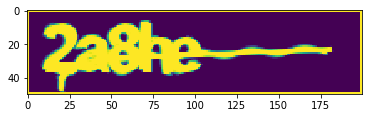

In [39]:
plt.imshow(channels)

In [34]:
im_arr = np.array(img_file)
im_arr

array([[[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255]],

       [[  0,   0,   0, 255],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        ...,
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0, 255]],

       [[  0,   0,   0, 255],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        ...,
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0, 255]],

       ...,

       [[  0,   0,   0, 255],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        ...,
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0, 255]],

       [[  0,   0,   0, 255],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        ...,
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0, 255]],

       [[  0

In [33]:
image_act = img_file[:,:,:,1]

IndexError: too many indices for array

In [28]:
image_act

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [15]:
gray = cv2.cvtColor(img_file, cv2.COLOR_BGR2GRAY)
gray.shape

(50, 200)

In [19]:
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)
print(img_file)

[[[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0   0]
  [  0   0   0   0]
  ...
  [  0   0   0   0]
  [  0   0   0   0]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0   0]
  [  0   0   0   0]
  ...
  [  0   0   0   0]
  [  0   0   0   0]
  [  0   0   0 255]]

 ...

 [[  0   0   0 255]
  [  0   0   0   0]
  [  0   0   0   0]
  ...
  [  0   0   0   0]
  [  0   0   0   0]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0   0]
  [  0   0   0   0]
  ...
  [  0   0   0   0]
  [  0   0   0   0]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]]


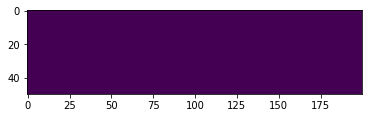

In [18]:
plt.imshow(thresh)

In [84]:
from tqdm import tqdm
kernel = np.ones((2,2),np.uint8)
for item in tqdm(png_files):
    img_file = cv2.imread(item, cv2.IMREAD_UNCHANGED)
    get_alpha = cv2.split(img_file)[3]
    erosion = cv2.erode(get_alpha,kernel,iterations = 2)
    cv2.imwrite(item,get_alpha)

100%|██████████| 16/16 [00:00<00:00, 1243.15it/s]


In [42]:
img_file = cv2.imread(png_files[0], cv2.IMREAD_UNCHANGED)

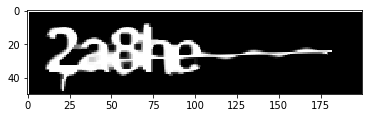

In [78]:
kernel = np.ones((2,2),np.uint8)
#dialate = cv2.dilate(thresh,kernel,iterations = 1)
erosion = cv2.erode(img_file,kernel,iterations = 2)
dialate = cv2.dilate(erosion,kernel,iterations = 4)
#erosion = cv2.erode(dialate,kernel,iterations = 6)
plt.imshow(erosion,cmap='gray')
plt.show()

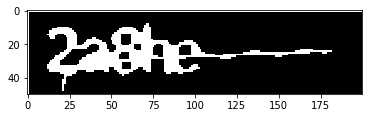

In [79]:
ret, thresh = cv2.threshold(erosion, 0, 255, cv2.THRESH_OTSU)
plt.imshow(thresh,cmap='gray')
plt.show()